# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: John Paparrizos / Tom Bihari
- Section: Wednesday/Friday 11:10 AM
- Student Name: Sam Warg
- Student Email: warg.2@buckeyemail.osu.edu
- Student ID: 500389167
***

***
# Introduction

This homework will focus on a modified version of the kaggle dataset "Pima Indians Diabets Database". It can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The overarching objective is to diagnostically predict whether or not a patient has diabetes based upon several other covariates. The full description is shown on the website.

Your task will be to first:
1) Do the prerequisite EDA to understand the data set you will be working on. 
2) Fit an appropriate logistic model and analyze it.

While some of the questions have exact answers, a few others are more open to interpretation. However, what we're looking for is the correct thinking and analysis. For the objective questions, while some points are awarded for "the correct number", the majority of the points will be awarded for a proper analysis and logical investigation.  Therefore, for each question (as appropriate) do the following:

1) Describe what you are trying to understand, determine, or answer.
2) How you are trying to do it (e.g., What are you trying to display or compute.)
3) Do it (show and run the code).
4) Describe the results and what they tell you regarding 1) above.

Note: This does not have to be lengthy.  In some cases, you can say it all in a couple of sentences.

Note: The data has been modified in both some subtle and not-so-subtle ways. You're welcome to look at other previous work online (in kaggle, stack overflow, etc -- and in fact that's critical to learning how to write good code!) but be wary about just using other people's work. It would both be a violation of the academic code of conduct, but it may also lead you down the wrong path.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.


### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (10%)
> -	Is it well organized and does the presentation flow in a logical manner?
> -	Are there no grammar and spelling mistakes?
> -	Do the charts/graphs relate to the text?
> -	Are the summarized key points and findings understandable by non-experts?
> -	Do the Overview and Conclusions provide context for the entire exercise?
2.	Domain Understanding Phase (10%)
> -	Did you provide a reasonable level of information?
3.	Data Understanding Phase (30%)
> -	Did you find novel and/or interesting insights, or did you solely focus on simple summarizations of the data?
> -	Did you draw and present potential conclusion or observations from your analysis of the data?
> -	Did the statistics and visualizations you used make sense in the context of the data?
4.	Data Analysis Phase (40%)
> -   Did you correctly do the data cleaning steps and perform the appropriate logistic regression.
> -   Was your analysis of the significant variables appropriate.
> -   How have you justified your feature transformation and/or feature creation steps.
5.  Conclusions (10%)
> -   Did you summarize appropriately your critical findings. 
> -   Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project1_Surname_DotNumber.zip

The submitted file should be less than 10MB.


***

***
# Section 0: Setup
- Add any needed imports, helper functions, etc., here.
***

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
diabetes = pd.read_csv('diabetes_hw_data_3494.csv')

***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***


   Per the website provided above, the dataset is provided by the National Institute of Diabetes and Digestive and Kidney Diseases, which aims to use different covariates to predict whether or not a person of Pima Indian descent has diabetes. Each row represents a singular woman, who is 21 years old (or older) and of Pima Indian heritage. This data was likely collected to create a model that is able to predict whether or not someone has diabetes or is likely to develop it in order to give medical attention to those who need it. I assume that it was collected by traveling to Pima Native American reservations and obtaining measurements from those who meet the qualifications for the dataset. <br>
<br>
   As for what types of questions that might be answered from analyzing this data, the obvious one is whether or not a person has diabetes. Additionally, it can be used to say whether or not someone is at risk for the disease. For example, if, after obtaining the necessary measurements, a model predicts a 90% chance of that person having diabetes but, after testing, they do not, they can be informed that they are at-risk. If a model gives a 5% chance of someone having the disease, on the other hand, they can assume, with a decent amount of confidence, that they are not in danger of developing it. Finally, analysis with this data can prove which of the covariates provided are most influential in causing someone to have diabetes. 


***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
***

***
## Section: 2.1 - Describe the meaning and type of data for each feature.
***

- The "Pregnancies" feature is the number of pregnancies that the patient has had, and it is a discrete, quantitative variable. 
- "Glucose" represents the glucose level of the patient, likely measured in mg/dL. This is also a discrete, quantitative variable.
- "BloodPressure" is simply the blood pressure of the patient at the time. Similarly, this is a discrete, quantitative variable.
- "SkinThickness" measures how thick the patient's skin is, as people with diabetes have a greater skin thickness. This is also a discrete, quantitative variable.
- "Insulin" is the insulin level of the patient at the time. This is a discrete, quantitative variable.
- "BMI" is the body mass index of the patient. This is a continuous, quantitative variable.
- "DiabetesPedigreeFunction" is a score from an algorithm that predicts how likely someone is to have diabetes based on family history. It is a continuous, quantitative variable.
- "Age" is how old the patient is. This is a discrete, quantitative variable.
- "Outcome" is the dependant variable, which states whether or not the patient has diabetes. It is a qualitative, binary variable.

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [315]:
diabetes['Outcome'].value_counts()

0    510
1    273
Name: Outcome, dtype: int64

There are 783 rows in this data representing 783 patients that partook in the study. Of those, 510 did not have diabetes, while 273 were diagnosed with the disease.

In [316]:
diabetes.loc[:, diabetes.columns != "Outcome"].quantile(q = [0, .25, .5, .75, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.078,21.0
0.25,1.0,99.0,63.0,0.0,0.0,27.35,0.242,24.0
0.50,3.0,117.0,72.0,23.0,36.0,32.00,0.370,29.0
0.75,6.0,141.0,80.0,32.0,130.0,36.60,0.625,41.0
1.00,17.0,199.0,504.0,273.0,846.0,264.60,2.420,567.0


- 75% of the women had between 0 and 6 pregancies, but some had all the way up to 17, which seems like there could be outliers in the data.
- Attributes such as BloodPressure, SkinThickness, Insulin, and BMI have very large ranges of values, including an extreme increase from the 75th percentile to the 100th percentile, which also indicates that some outliers could exist.
- The Age variable is especially interesting, as the maximum value is 567 years old, which is not possible. There could be bad data included.

In [317]:
diabetes.mean()

Pregnancies                   3.841635
Glucose                     121.280971
BloodPressure                70.726692
SkinThickness                20.968072
Insulin                      82.762452
BMI                          32.360409
DiabetesPedigreeFunction      0.470271
Age                          34.444444
Outcome                       0.348659
dtype: float64

The mean of most of these variables appears normal for an average woman. One value that jumps out is that about 35% of the patients have diabetes, even though the average percentage of Native American women with diabetes is about 15%.

In [318]:
diabetes.loc[:, diabetes.columns != "Outcome"].median()

Pregnancies                   3.00
Glucose                     117.00
BloodPressure                72.00
SkinThickness                23.00
Insulin                      36.00
BMI                          32.00
DiabetesPedigreeFunction      0.37
Age                          29.00
dtype: float64

Most of these numbers are relatively similar to means above; however, the median Insulin value is only 36.00 whereas the mean Insulin measurement is 82.76. This means that there are some Insulin values in this dataset with extremely high Insulin levels, inflating the mean of the dataset.

In [319]:
diabetes.std()

Pregnancies                   3.366824
Glucose                      32.325356
BloodPressure                31.374634
SkinThickness                18.732339
Insulin                     121.761453
BMI                          11.463401
DiabetesPedigreeFunction      0.330093
Age                          25.167961
Outcome                       0.476850
dtype: float64

The statement we made about the Insulin values above is confirmed here, as that variable has an abnormally large standard deviation of 121.76. The rest of the variables have more reasonable standard deviations, however, Glucose and BloodPressure are more spread out than the rest of the variables (other than Insulin), which could make sense given that those values may change significantly based on whether someone has diabetes or not.

***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

The plt.figure( ) function used below was found from: https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python

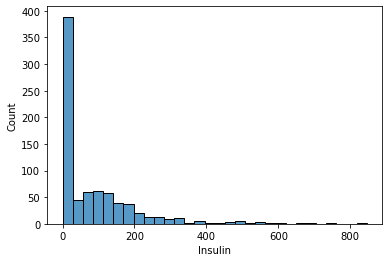

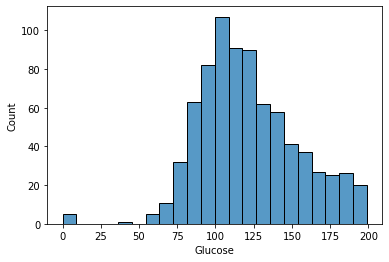

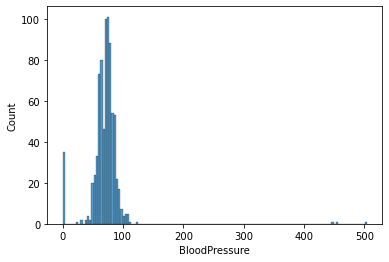

In [320]:
variables = ["Insulin", "Glucose", "BloodPressure"]
for var in variables:
    plt.figure()
    sns.histplot(diabetes[var])

A histogram of the Insulin variable confirms what we discovered above. There are many patients that reported an insulin reading greater than 400, which is inflating the mean. 

After viewing plots of the Glucose and BloodPressure variables, the standard deviation appears to be slightly higher than other variables because of a few outliers (a few values less than 10 for Glucose and a few values greater than 450 for BloodPressure). Other than those few instances, the distributions of those variables are as expected.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

There have been outliers discovered in the BloodPressure, Glucose, and Insulin attributes. I belive that these rows should be removed from the dataset because these measurements seem unobtainable for a human to record, likely indicating bad data. 

In [321]:
na_search = diabetes.isnull()
na_search

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
778,False,False,False,False,False,False,False,False,False
779,False,False,False,False,False,False,False,False,False
780,False,False,False,False,False,False,False,False,False
781,False,False,False,False,False,False,False,False,False


In [322]:
na_search.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the data.

In [323]:
diabetes[diabetes.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


There are 15 duplicated rows in the dataset. These rows should be removed because it is very unlikely for two different patients to have the same values for all 9 variables; therefore, the rows were likely added by accident and if left in, will affect the accuracy of the analysis.

***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

In [324]:
diabetes.loc[:, diabetes.columns != "Outcome"].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.132242,0.111254,-0.073844,-0.084473,-0.013870,-0.039626,0.318427
Glucose,0.132242,1.000000,0.115182,0.070279,0.332334,0.194518,0.129911,0.113154
BloodPressure,0.111254,0.115182,1.000000,0.084777,0.011787,0.105670,0.063477,0.082517
SkinThickness,-0.073844,0.070279,0.084777,1.000000,0.443238,0.245583,0.252775,-0.023174
Insulin,-0.084473,0.332334,0.011787,0.443238,1.000000,0.135811,0.172908,-0.023527
BMI,-0.013870,0.194518,0.105670,0.245583,0.135811,1.000000,0.090792,-0.011499
DiabetesPedigreeFunction,-0.039626,0.129911,0.063477,0.252775,0.172908,0.090792,1.000000,0.004050
Age,0.318427,0.113154,0.082517,-0.023174,-0.023527,-0.011499,0.004050,1.000000


Based on the correlation matrix above, none of the predictors have a correlation coefficient above 0.50, which means that the variables are loosely correlated with each other and it would be likely to include each of them in a model. The two variables that are most closely related are Insulin and SkinThickness followed by Insulin and Glucose (both of which make sense considering how these factors are related within the human body); however, the correlation is not enough to remove any from any potential model fitting.

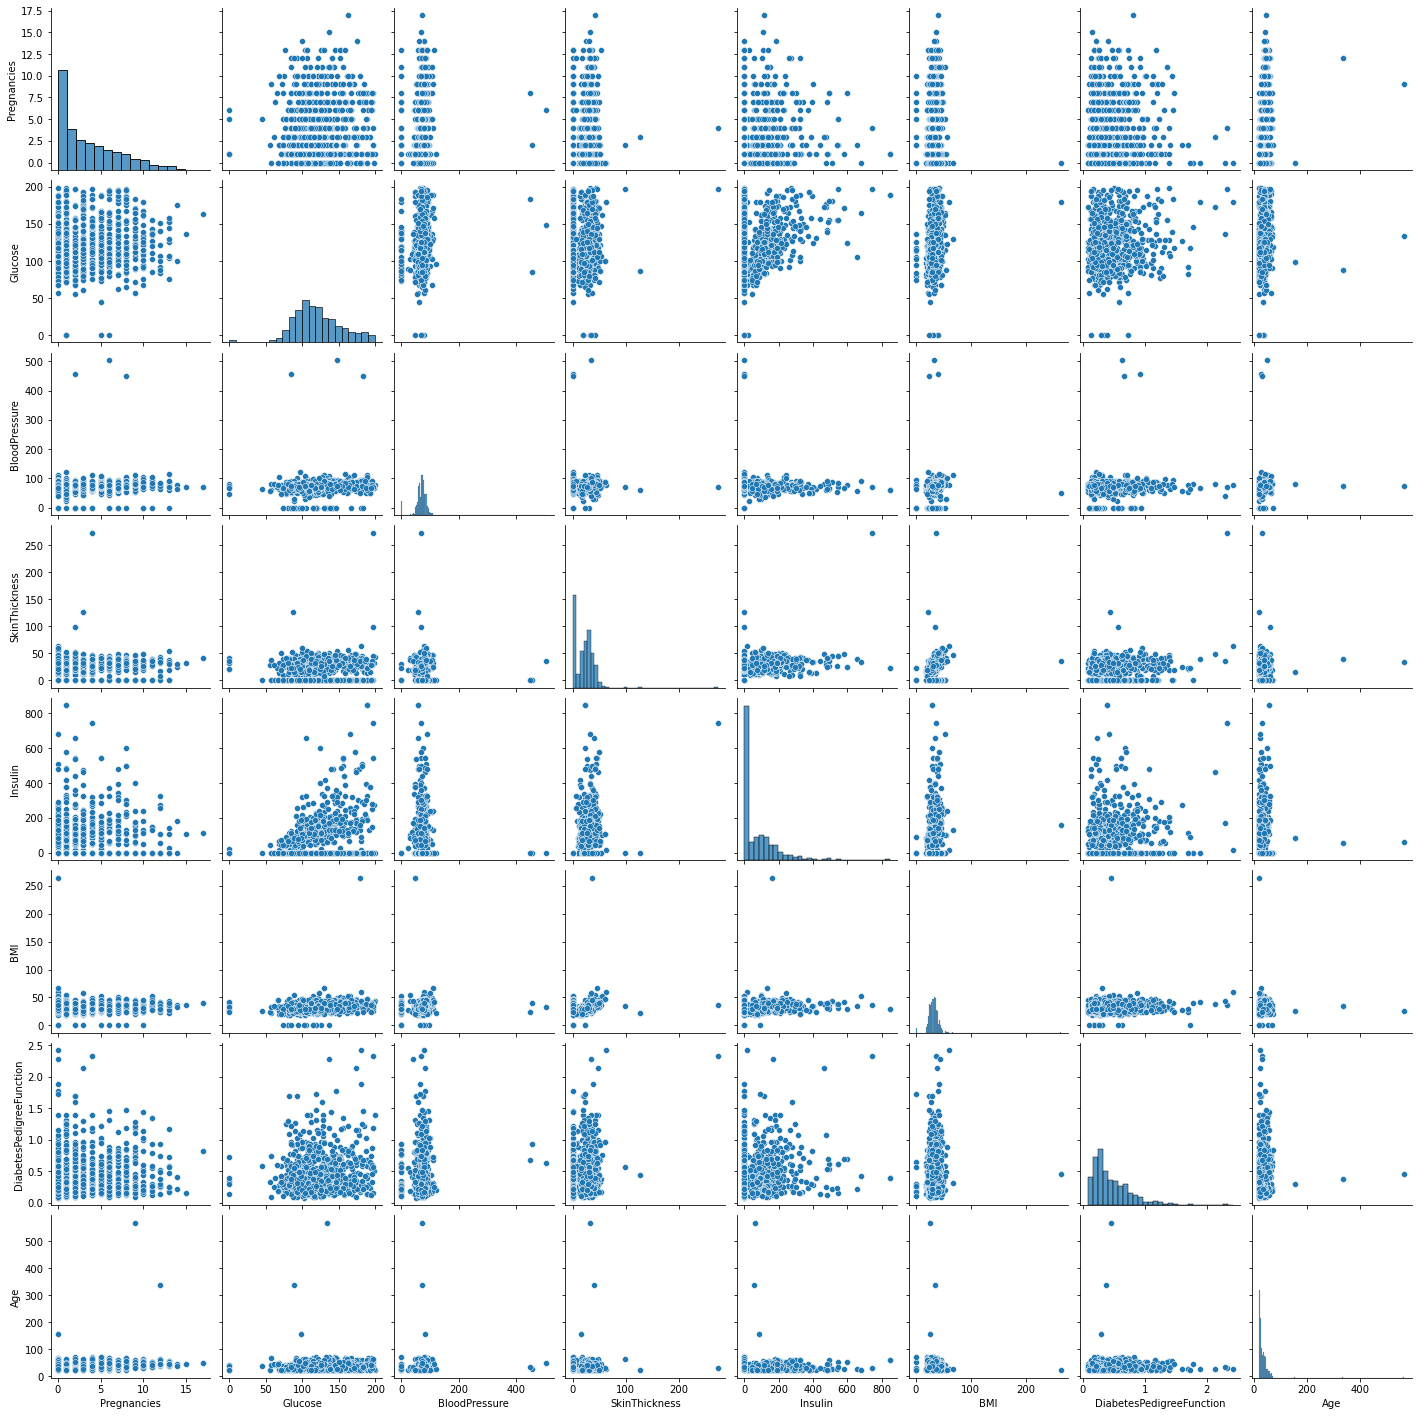

In [325]:
sns.pairplot(diabetes.loc[:, diabetes.columns != "Outcome"])

In the scatterplot matrix above, we still do not see much correlation between the variables. The points are randomly scatter across each grid, no real patterns exist within the plots. With this and the correlation matrix above, we can be confident that the variables are loosely correlated with one another and are not redundant.

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 
***

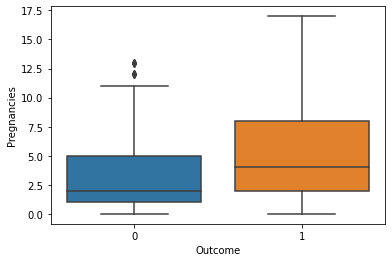

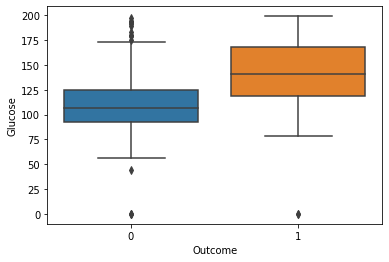

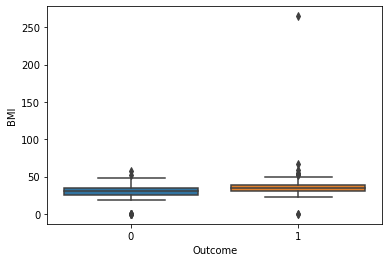

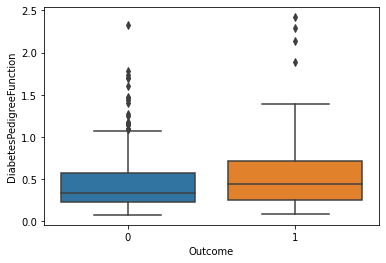

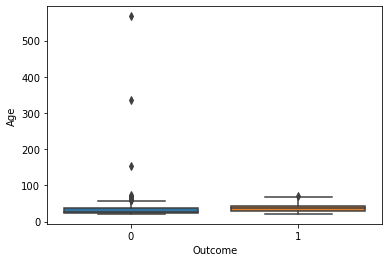

In [326]:
variables = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction", "Age"]
for var in variables:
    plt.figure()
    sns.boxplot(y = diabetes[var], x = diabetes["Outcome"])

The boxplots produced above depict some interesting relationships between the Outcome variable and some of the other attributes. The medians and IQRs of the Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age attributes all appear to be (possibly) significantly larger when the patient has diabetes as opposed to when they do not. This is a useful observation because some of, if not all, of these variables may be statistically significant in a logistic regression model to help predict whether or not someone has diabetes. The boxplots of the other attributes, BloodPressure, SkinThickness, and Insulin, with the Outcome variable did not show as big of a median and IQR difference, but that does not mean that those will not be signficiant in a model.

***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
      
      We would change it to the median value because the mean is greatly skewed by outliers, whereas the median
      is less affected by them.
  
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How many duplicate records were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***

In [327]:
diabetes[diabetes.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


There were 15 duplicate records (shown above). These were removed from the dataset below.

In [328]:
diabetes = diabetes.drop_duplicates()
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5.0      144           82.0           26.0    285.0  32.0   
1            5.0      137          108.0            0.0      0.0  48.8   
2            5.0      109           75.0           26.0      0.0  36.0   
3            3.0      113           50.0           10.0     85.0  29.5   
4            2.0       96           68.0           13.0     49.0  21.1   
..           ...      ...            ...            ...      ...   ...   
778          1.0       71           48.0           18.0     76.0  20.4   
779          2.0      112           78.0           50.0    140.0  39.4   
780          0.0      138            0.0            0.0      0.0  36.3   
781          4.0      183            0.0            0.0      0.0  28.4   
782          8.0      183          448.0            0.0      0.0  23.3   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.452  58.0        1  
1                

Before, there were 783 rows in the dataset; however, after removing the 15 duplicate rows, there are now 768 rows.

The pd.DataFrame( ) function used below was found at: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [329]:
iqr = diabetes.quantile(.75) - diabetes.quantile(.25)
ll = diabetes.quantile(.25) - 1.5*iqr
ul = diabetes.quantile(.75) + 1.5*iqr
outlier_range = pd.DataFrame(ll, columns = ["Lower Limit"])
outlier_range["Upper Limit"] = ul
print(outlier_range)

                          Lower Limit  Upper Limit
Pregnancies                    -6.500       13.500
Glucose                        37.125      202.125
BloodPressure                  35.000      107.000
SkinThickness                 -48.000       80.000
Insulin                      -193.875      323.125
BMI                            13.350       50.550
DiabetesPedigreeFunction       -0.330        1.200
Age                            -1.500       66.500
Outcome                        -1.500        2.500


These are the outlier ranges using the IQR method. Any values in the dataset that fall outside these ranges will be considered an outlier and will be set to the median value of the attribute.

In [330]:
variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for var in variables:
    lower_outliers = diabetes.loc[diabetes[var] < outlier_range.loc[var, "Lower Limit"], [var]]
    upper_outliers = diabetes.loc[diabetes[var] > outlier_range.loc[var, "Upper Limit"], [var]]
    for outlier in lower_outliers, upper_outliers:
        print(outlier)
    print("Number of Outliers for " + var + ": " + str(len(lower_outliers) + len(upper_outliers)))

Empty DataFrame
Columns: [Pregnancies]
Index: []
     Pregnancies
364         14.0
374         15.0
555         14.0
724         17.0
Number of Outliers for Pregnancies: 4
     Glucose
211        0
282        0
592        0
683        0
686        0
Empty DataFrame
Columns: [Glucose]
Index: []
Number of Outliers for Glucose: 5
     BloodPressure
45             0.0
101            0.0
112            0.0
131            0.0
149            0.0
151            0.0
198            0.0
220            0.0
236            0.0
253           24.0
268            0.0
306            0.0
336            0.0
348           30.0
357            0.0
373           30.0
377            0.0
378            0.0
421            0.0
441            0.0
484            0.0
506            0.0
533            0.0
541            0.0
563            0.0
598            0.0
612            0.0
644            0.0
658            0.0
716            0.0
733            0.0
734            0.0
743            0.0
745            0.0
760   

In [331]:
for var in variables:
    print(var + " " + str(diabetes[var].median()))

Pregnancies 3.0
Glucose 117.0
BloodPressure 72.0
SkinThickness 23.0
Insulin 30.5
BMI 32.0
DiabetesPedigreeFunction 0.3725
Age 29.0


In [332]:
for var in variables:
    diabetes.loc[diabetes[var] < outlier_range.loc[var, "Lower Limit"], var] = diabetes[var].median()
    diabetes.loc[diabetes[var] > outlier_range.loc[var, "Upper Limit"], var] = diabetes[var].median()

The number of outliers for each variable is printed below the list of outliers for that specific attribute. All of these values were replaced by the median value for each attribute, which are listed directly above. 

In [333]:
diabetes.mean()

Pregnancies                   3.782552
Glucose                     121.656250
BloodPressure                72.216146
SkinThickness                20.423177
Insulin                      61.574219
BMI                          32.191406
DiabetesPedigreeFunction      0.427667
Age                          32.744792
Outcome                       0.348958
dtype: float64

In [334]:
diabetes.loc[:, diabetes.columns != "Outcome"].median()

Pregnancies                   3.00000
Glucose                     117.00000
BloodPressure                72.00000
SkinThickness                23.00000
Insulin                      29.75000
BMI                          32.00000
DiabetesPedigreeFunction      0.37175
Age                          29.00000
dtype: float64

In [335]:
diabetes.std()

Pregnancies                  3.270644
Glucose                     30.438286
BloodPressure               11.139750
SkinThickness               15.684531
Insulin                     78.754113
BMI                          6.407367
DiabetesPedigreeFunction     0.245162
Age                         11.036503
Outcome                      0.476951
dtype: float64

After removing duplicates, outliers, and missing values, the means of all variables changed at least slightly. The mean of Insulin changed drastically, though, from about 82.8 to 61.5. The medians, however, all stayed the same, which is expected since we replaced the outlier values with the median values. The standard deviations, like the means, also all changed slightly, with the Insulin one changing the most, from 121.8 to 78.2.

Some of the histograms and boxplots produced in Section 2 have changed with the removal of this data. These plots no longer contain outliers; therefore, their scale is now more concise and easier to view the plots.

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

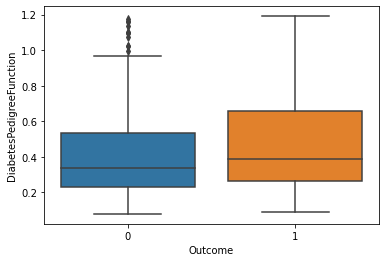

In [336]:
sns.boxplot(y=diabetes['DiabetesPedigreeFunction'], x = diabetes['Outcome'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

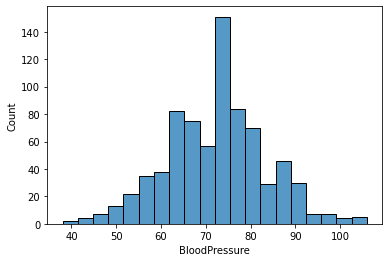

In [337]:
sns.histplot(diabetes['BloodPressure'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

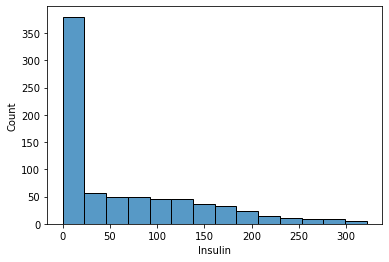

In [338]:
sns.histplot(diabetes['Insulin'])

For example, the boxplot of the DiabetesPedigreeFunction attribute no longer contains the long string of outliers on the top of the orange box. Furthermore, the histograms of the BloodPressure and Insulin attributes no longer have the extreme outliers to the far right of the plot, making the graph easier to view and follow a more typical distribution.

***
## Section: 3.2 - Did you decide to implement any feature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

In [339]:
new_diabetes = diabetes.copy()

A new dataset was made so I do not make any additional changes to the original dataset and can still run both models in Section 3.4 and Section 3.5.

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

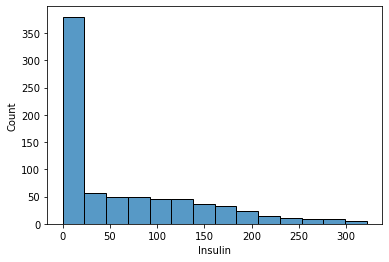

In [340]:
sns.histplot(diabetes['Insulin'])

In [341]:
new_diabetes["Insulin"] = np.log(new_diabetes["Insulin"] + 1)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

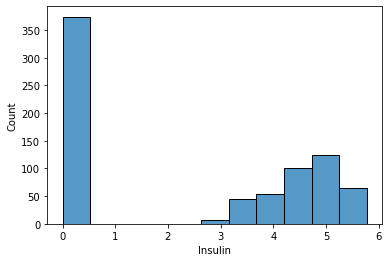

In [342]:
sns.histplot(new_diabetes['Insulin'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

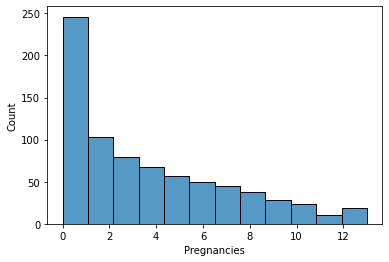

In [343]:
sns.histplot(diabetes['Pregnancies'])

In [344]:
new_diabetes["Pregnancies"] = np.log(new_diabetes["Pregnancies"] + 1)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

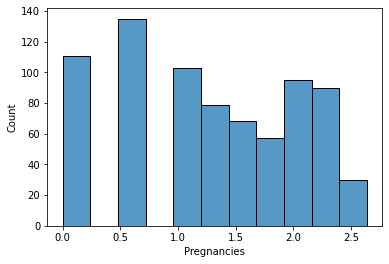

In [345]:
sns.histplot(new_diabetes['Pregnancies'])

I chose to do a natural log transformation of the Insulin and Pregnancies variables because, as seen above, their distributions in the original dataset are right-skewed. In an attempt to achieve something closer to a normal distribution, I took the natural log (plus 1) of each of these variables. The reason I took the natural log plus 1 is because both variables have values equal to zero, and the natural log of zero is undefined. Though it breaks up the distributions slightly, each value had the same constant (1) added to it. The other boxplots above show the results of this transformation. It is not perfect due to the existance of values equal to 0; however, this transformation somewhat normalizes those two attributes.

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

In [346]:
new_diabetes['Age_Group'] = pd.cut(new_diabetes['Age'], bins=[0, 36, 51, float('Inf')], labels=['Under_36', '36_to_51', 'Over_51'])

In [347]:
new_diabetes['Pregnancy_Indicator'] = pd.cut(new_diabetes['Pregnancies'], bins=[-0.1, 0.9, float('Inf')], labels=['Never_Pregnant', 'Pregnant'])
new_diabetes['Pregnancy_Indicator'].replace(['Never_Pregnant', 'Pregnant'],
                        [0, 1], inplace=True)

In [348]:
new_diabetes = new_diabetes.drop(['Age', 'Pregnancies'], axis = 1)

In [349]:
new_diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_Group,Pregnancy_Indicator
0,144,82.0,26.0,5.655992,32.0,0.452,1,Over_51,1
1,137,72.0,0.0,0.000000,48.8,0.227,1,36_to_51,1
2,109,75.0,26.0,0.000000,36.0,0.546,0,Over_51,1
3,113,50.0,10.0,4.454347,29.5,0.626,0,Under_36,1
4,96,68.0,13.0,3.912023,21.1,0.647,0,Under_36,1
...,...,...,...,...,...,...,...,...,...
778,71,48.0,18.0,4.343805,20.4,0.323,0,Under_36,0
779,112,78.0,50.0,4.948760,39.4,0.175,0,Under_36,1
780,138,72.0,0.0,0.000000,36.3,0.933,1,Under_36,0
781,183,72.0,0.0,0.000000,28.4,0.212,1,Under_36,1


Above, I chose to create two new features to get some different results. First, I made the Age attribute a categorical one by creating a new column, Age_Group, which places each patient into one of three categories (Under_36, 36_to_51, or Over_51) based on their age. The purpose of this is to see if the risk of having diabetes is more predictable when patients are placed into different age groups which represent very different times in people's lives (younger adults, middle-aged adults, and older adults), especially with regards to health.

The other new feature I chose to create is a binary attribute named Pregnancy_Indicator, which is set to 1 if the patient has been pregnant before or 0 otherwise. I chose to add this column to see if just being pregnant once puts someone at a higher risk for diabetes than someone who has never been pregnant, or if each pregnancy increases their chance of having the disease even more (what the original dataset is testing).

In addition, the original Age and Pregnancy variables were removed in favor of these new columns.

***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***

In [350]:
model = sm.Logit(diabetes['Outcome'], sm.add_constant(diabetes.loc[:, diabetes.columns != "Outcome"])).fit() 
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.468635
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.2755
Time:                        23:19:32   Log-Likelihood:                -359.91
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.642e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.4095      0.859    -10.960      0.000     -11.092

Choosing to recognize any p-value less than 0.05 as significant attribute, it is seen that Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age are significant in this model and will be further analyzed below.

The table ( ) function below (used to create misclassification tables) was taken directly from the class notes.

In [351]:
def table(predicted_probs, labels, cutoff):
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

In [352]:
sig_variables = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction", "Age"]
for var in sig_variables:
    var_model = sm.Logit(diabetes['Outcome'], sm.add_constant(diabetes[var])).fit()
    prob = var_model.predict(sm.add_constant(diabetes[var]))
    table_5 = table(prob, diabetes["Outcome"], cutoff=0.5)
    table_75 = table(prob, diabetes["Outcome"], cutoff=0.75)
    result = sm.stats.Table2x2(table_5)
    print(var)
    print(table_5)
    print(table_75)
    print(result.oddsratio)

Optimization terminated successfully.
         Current function value: 0.626589
         Iterations 5
Pregnancies
predicted_outcome    0   1
actual_outcome            
0                  462  38
1                  224  44
predicted_outcome    0
actual_outcome        
0                  500
1                  268
2.388157894736842
Optimization terminated successfully.
         Current function value: 0.516692
         Iterations 6
Glucose
predicted_outcome    0    1
actual_outcome             
0                  440   60
1                  136  132
predicted_outcome    0   1
actual_outcome            
0                  489  11
1                  203  65
7.117647058823529
Optimization terminated successfully.
         Current function value: 0.600846
         Iterations 5
BMI
predicted_outcome    0   1
actual_outcome            
0                  441  59
1                  207  61
predicted_outcome    0  1
actual_outcome           
0                  500  0
1                  264  4
2.

Above are the misclassification tables for each of the significant variables in the model at cutoff = 0.5 and cutoff = 0.75, respectively. Below those, for each, the odds ratio is printed at significance level 0.05. Since the odds ratios (for all 5 significant attributes) are well above 1, it can be concluded that:
- It is more likely for a patient with more pregnancies to have diabetes than a patient with less pregnancies
-  It is more likely for a patient with a higher glucose level to have diabetes than a patient with a lower glucose level
-  It is more likely for a patient with a higher BMI to have diabetes than a patient with a lower BMI
- It is more likely for a patient with a higher Diabetes Pedigree Function score to have diabetes than a patient with a lower Diabetes Pedigree Function score
- It can be concluded that it is more likely for an older patient to have diabetes than a younger patient

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

In [353]:
dummied_data = pd.get_dummies(new_diabetes, columns=['Age_Group'], drop_first=False)
dummied_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Pregnancy_Indicator,Age_Group_Under_36,Age_Group_36_to_51,Age_Group_Over_51
0,144,82.0,26.0,5.655992,32.0,0.452,1,1,0,0,1
1,137,72.0,0.0,0.000000,48.8,0.227,1,1,0,1,0
2,109,75.0,26.0,0.000000,36.0,0.546,0,1,0,0,1
3,113,50.0,10.0,4.454347,29.5,0.626,0,1,1,0,0
4,96,68.0,13.0,3.912023,21.1,0.647,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
778,71,48.0,18.0,4.343805,20.4,0.323,0,0,1,0,0
779,112,78.0,50.0,4.948760,39.4,0.175,0,1,1,0,0
780,138,72.0,0.0,0.000000,36.3,0.933,1,0,1,0,0
781,183,72.0,0.0,0.000000,28.4,0.212,1,1,1,0,0


In [354]:
new_model = sm.Logit(dummied_data['Outcome'], sm.add_constant(dummied_data.loc[:, dummied_data.columns != "Outcome"])).fit() 
print(new_model.summary())

Optimization terminated successfully.
         Current function value: 0.471290
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      758
Method:                           MLE   Df Model:                            9
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.2714
Time:                        23:19:32   Log-Likelihood:                -361.95
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 7.251e-53
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4328   4.55e+06  -1.41e-06      1.000   -8.93e+0

Choosing to recognize any p-value less than 0.05 as significant attribute, it is seen that Glucose, BMI, DiabetesPedigreeFunction, and Pregnancy_Indicator are significant in this model and will be further analyzed below. The first 3 of those variables remain significant from the previous model; however, after breaking the Age attribute up into 3 different categories, it is no longer significant. Due to this, it can be concluded that there is no significant difference between patients under 36, patients between 36 and 51, and patients over 51 and their risk of getting diabetes. Leaving age as a continuous variable is more effective. Furthermore, taking the natural log of the Insulin variable reduce its p-value; however, it is still not significant enough to help predict diabetes. Finally, regarding the Pregnancy variable, with which we took the natural log of and made a binary variable, its p-value increased; however, it is still significant. This means that simply stating whether or not the patient has had a pregnancy or not is still useful in predicting diabetes; however, leaving the variable untransformed and continuous is still likely more effective.

In [355]:
new_sig_variables = ["Glucose", "BMI", "DiabetesPedigreeFunction"]
for var in new_sig_variables:
    var_model = sm.Logit(dummied_data['Outcome'], sm.add_constant(dummied_data[var])).fit()
    prob = var_model.predict(sm.add_constant(dummied_data[var]))
    table_5 = table(prob, dummied_data["Outcome"], cutoff=0.5)
    table_75 = table(prob, dummied_data["Outcome"], cutoff=0.75)
    result = sm.stats.Table2x2(table_5)
    print(var)
    print(table_5)
    print(table_75)
    print(result.oddsratio)

Optimization terminated successfully.
         Current function value: 0.516692
         Iterations 6
Glucose
predicted_outcome    0    1
actual_outcome             
0                  440   60
1                  136  132
predicted_outcome    0   1
actual_outcome            
0                  489  11
1                  203  65
7.117647058823529
Optimization terminated successfully.
         Current function value: 0.600846
         Iterations 5
BMI
predicted_outcome    0   1
actual_outcome            
0                  441  59
1                  207  61
predicted_outcome    0  1
actual_outcome           
0                  500  0
1                  264  4
2.202652910832719
Optimization terminated successfully.
         Current function value: 0.635444
         Iterations 5
DiabetesPedigreeFunction
predicted_outcome    0   1
actual_outcome            
0                  481  19
1                  249  19
predicted_outcome    0
actual_outcome        
0                  500
1           

In [356]:
var_model = sm.Logit(dummied_data['Outcome'], sm.add_constant(dummied_data["Pregnancy_Indicator"])).fit()
prob = var_model.predict(sm.add_constant(dummied_data["Pregnancy_Indicator"]))
table_5 = table(prob, dummied_data["Outcome"], cutoff=0.5)
table_75 = table(prob, dummied_data["Outcome"], cutoff=0.75)
table_3 = table(prob, dummied_data["Outcome"], cutoff=0.3)
print(var)
print(table_5)
print(table_75)
print(table_3)
result = sm.stats.Table2x2(table_3)
print(result.oddsratio)

Optimization terminated successfully.
         Current function value: 0.640574
         Iterations 5
DiabetesPedigreeFunction
predicted_outcome    0
actual_outcome        
0                  500
1                  268
predicted_outcome    0
actual_outcome        
0                  500
1                  268
predicted_outcome    0    1
actual_outcome             
0                  179  321
1                   67  201
1.6728971962616823


Above are the misclassification tables for each of the significant variables in the new model at cutoff = 0.5 and cutoff = 0.75, respectively. Below those, for each, the odds ratio is printed at significance level 0.05. Since the odds ratios (for all 5 significant attributes) are well above 1, it can be still be concluded that:
-  It is more likely for a patient with a higher glucose level to have diabetes than a patient with a lower glucose level
-  It is more likely for a patient with a higher BMI to have diabetes than a patient with a lower BMI
- It is more likely for a patient with a higher Diabetes Pedigree Function score to have diabetes than a patient with a lower Diabetes Pedigree Function score

For the Pregnancy_Indicator variable, however, producing an odds ratio for the misclassification table of cutoff = 0.5 does not make sense because a 2x1 table is produced since the predicted values are all below a probability of 0.5. Instead, a misclassification table was fit with cutoff = 0.3, and the odds ratio was produced from that. With a value of 1.673 (well above 1), it can be concluded that it is more likely for a patient who has had a pregnancy to have diabetes than a patient who has not.

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

Overall it can be concluded that, for trying to predict whether or not women of Pima Indian descent have diabetes or not, the number of pregnancies they have had, their glucose level, their BMI, their Diabetes Pedigree Function score, and their age are the most useful predictors. An increase in any of these variables results in an increased chance of having the disease. 

Throughout this assignment, I learned a variety of Python skills for data science that I have not previously used before. It was useful see how these concepts translate from R (which I used previously) to Python. Additionally, I learned how to construct misclassification tables and produce and interpret odds ratios from them. 

With additional data and resources, I would like to explore additional attributes to see how they can help predict diabetes, such as blood type, or extend the dataset to include other cultures/genders to see how the probability of having diabetes changes throughout different races/genders. To gain deeper insight, future research might require gathering information from more patients, performing more tests on the patients, and learning more about the disease itself.